<a href="https://colab.research.google.com/github/Darshan99225/-sms-text-classification/blob/main/sms_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.0/590.0 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.7/584.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 35.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Fou

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2024-04-02 11:14:52--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K  --.-KB/s    in 0.006s  

2024-04-02 11:14:52 (59.6 MB/s) - ‘train-data.tsv’ saved [358233/358233]

--2024-04-02 11:14:52--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.3.33, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[==========

In [ ]:
train_df = pd.read_csv(test_file_path, sep="\t", header=None, names=["type", "msg"])
train_df.dropna()
train_df.head()

,type,msg
0,ham,i am in hospital da. . i will return home in e...
1,ham,"not much, just some textin'. how bout you?"
2,ham,i probably won't eat at all today. i think i'm...
3,ham,don‘t give a flying monkeys wot they think and...
4,ham,who are you seeing?


In [ ]:
test_df = pd.read_csv(test_file_path, sep="\t", header=None, names=["type", "msg"])
test_df.dropna()
train_df.head()

,type,msg
0,ham,i am in hospital da. . i will return home in e...
1,ham,"not much, just some textin'. how bout you?"
2,ham,i probably won't eat at all today. i think i'm...
3,ham,don‘t give a flying monkeys wot they think and...
4,ham,who are you seeing?


In [ ]:
train_df["type"] = pd.factorize(train_df["type"])[0]
test_df["type"] = pd.factorize(test_df["type"])[0]

In [ ]:
train_labels =  train_df["type"].values
train_ds = tf.data.Dataset.from_tensor_slices(
    (train_df["msg"].values, train_labels)
)

In [ ]:
test_labels =  test_df["type"].values
test_ds = tf.data.Dataset.from_tensor_slices(
    (test_df["msg"].values, test_labels)
)
test_ds.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
BUFFER_SIZE = 100
BATCH_SIZE = 32
train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
from keras.layers import TextVectorization
vec = TextVectorization(
    output_mode='int',
    max_tokens=1000,
    output_sequence_length=1000,
)

vec.adapt(train_ds.map(lambda text, label: text))

In [ ]:
vocab = np.array(vec.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'i', 'to', 'you', 'a', 'the', 'u', 'and', 'is', 'in',
       'me', 'my', 'your', 'for', 'have', 'it', 'of', 'call', 'that'],
      dtype='<U16')

In [ ]:
model = tf.keras.Sequential([
    vec,
    tf.keras.layers.Embedding(
        len(vec.get_vocabulary()),
        64,
        mask_zero=True,
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)
])


model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=['accuracy'],
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    validation_steps=30,
    epochs=15,
)

Epoch 1/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.8693 - loss: 0.6900 - val_accuracy: 0.8604 - val_loss: 0.6711
Epoch 2/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.8690 - loss: 0.6580 - val_accuracy: 0.8773 - val_loss: 0.5839
Epoch 3/15


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


44/44 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.8653 - loss: 0.5604 - val_accuracy: 0.8604 - val_loss: 0.4937
Epoch 4/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 187s 4s/step - accuracy: 0.8704 - loss: 0.4628 - val_accuracy: 0.8773 - val_loss: 0.3862
Epoch 5/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 129s 3s/step - accuracy: 0.8729 - loss: 0.3756 - val_accuracy: 0.8604 - val_loss: 0.3023
Epoch 6/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.8701 - loss: 0.2669 - val_accuracy: 0.8773 - val_loss: 0.1696
Epoch 7/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.8907 - loss: 0.1608 - val_accuracy: 0.9781 - val_loss: 0.1165
Epoch 8/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.9691 - loss: 0.1131 - val_accuracy: 0.9838 - val_loss: 0.0725
Epoch 9/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 128s 3s/step - accuracy: 0.9772 - loss: 0.0875 - val_accuracy: 0.9854 - val_loss: 0.0604
Epoch 10/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 188s 4s/step - accuracy: 0.9808 - loss: 0.0704 - val_accuracy: 0.9884 - val_loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 817ms/step - accuracy: 0.9948 - loss: 0.0325
Test Loss: 0.02554553747177124
Test Accuracy: 0.9949712753295898


In [ ]:
def plot_graphs(h, metric):
    plt.plot(h.history[metric])
    plt.plot(h.history['val_'+metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

(0.0, 0.7180613500066102)

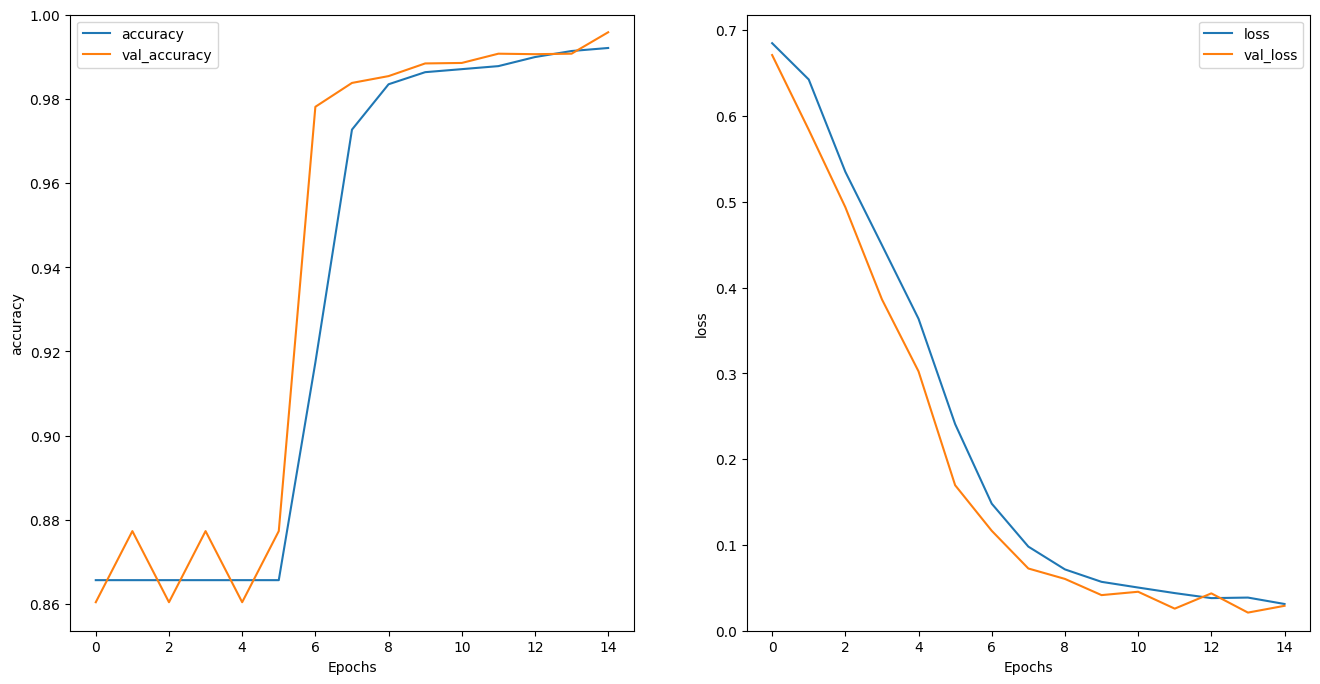

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
h = history.history
print(h['loss'])
print(h['val_loss'])
print(h['accuracy'])
print(h['val_accuracy'])

[0.6848740577697754, 0.6425631642341614, 0.5349721312522888, 0.4495549201965332, 0.36363089084625244, 0.24088728427886963, 0.1481076329946518, 0.09806252270936966, 0.071482352912426, 0.05698666721582413, 0.05033639445900917, 0.04386181756854057, 0.038009367883205414, 0.03864170238375664, 0.031164254993200302]
[0.6710579991340637, 0.5839444994926453, 0.493712455034256, 0.3862490952014923, 0.3023016154766083, 0.16960830986499786, 0.11650562286376953, 0.07254652678966522, 0.06039309501647949, 0.041512150317430496, 0.045421164482831955, 0.025734953582286835, 0.043546125292778015, 0.0211282130330801, 0.02903924137353897]
[0.8656609058380127, 0.8656609058380127, 0.8656609058380127, 0.8656609058380127, 0.8656609058380127, 0.8656609058380127, 0.9173850417137146, 0.9727011322975159, 0.983476996421814, 0.9863505959510803, 0.9870689511299133, 0.9877873659133911, 0.9899425506591797, 0.9913793206214905, 0.9920976758003235]
[0.8604166507720947, 0.8773148059844971, 0.8604166507720947, 0.8773148059844

In [ ]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])

def predict_message(pred_text):
  print(pred_text)
  dst= np.array([pred_text])
  dst = pd.DataFrame(dst)
  ps = model.predict(tf.convert_to_tensor(dst))
  print(ps)
  p = ps[0][0]
  return (p, "ham" if p <0.5 else "spam")

pred_text = "you have won £1000 cash! call to claim your prize."
prediction = predict_message(pred_text)
print(prediction)

you have won £1000 cash! call to claim your prize.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[3.567379]]
(3.567379, 'spam')


In [ ]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


how are you doing today
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
[[-6.286585]]
sale today! to stop texts call 98912460324
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
[[0.8332939]]
i dont want to go. can we try it a different day? available sat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
[[-10.221286]]
our new mobile video service is live. just install on your phone to start watching.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
[[2.0362613]]
you have won £1000 cash! call to claim your prize.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
[[3.567379]]
i'll bring it tomorrow. don't forget the milk.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
[[-9.395227]]
wow, is your arm alright. that happened to me one time too
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
[[-9.548782]]
You passed the challenge. Great job!
